# Add this at the beginning of the notebook
"""
# Loan Approval Prediction Analysis

## Project Overview
This project analyzes loan application data to predict approval status using machine learning. The analysis includes:
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model building and evaluation

## Key Steps:
1. Import libraries and dataset
2. Data cleaning and preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering
5. Model training and evaluation
6. Results interpretation
"""

# Importing the libraries and dataset

In [78]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv("LoanApprovalPrediction.csv")
print(data.head())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

# Data Cleaning

In [80]:
#Dropping load id column as it is completely unique and not co related to any other column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [81]:
#Getting the columns with categorical values
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print(object_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


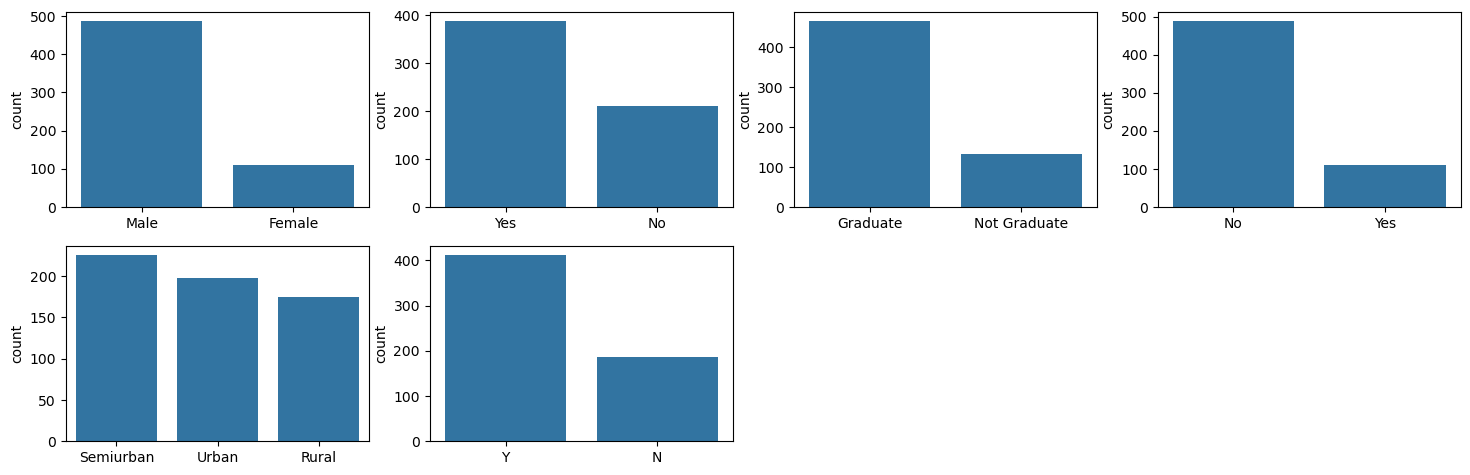

In [82]:
#Drawing the barplot of different variables
plt.figure(figsize=(18,36))
index = 1
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(12,4,index)
  sns.barplot(x=list(y.index), y=y)
  index +=1

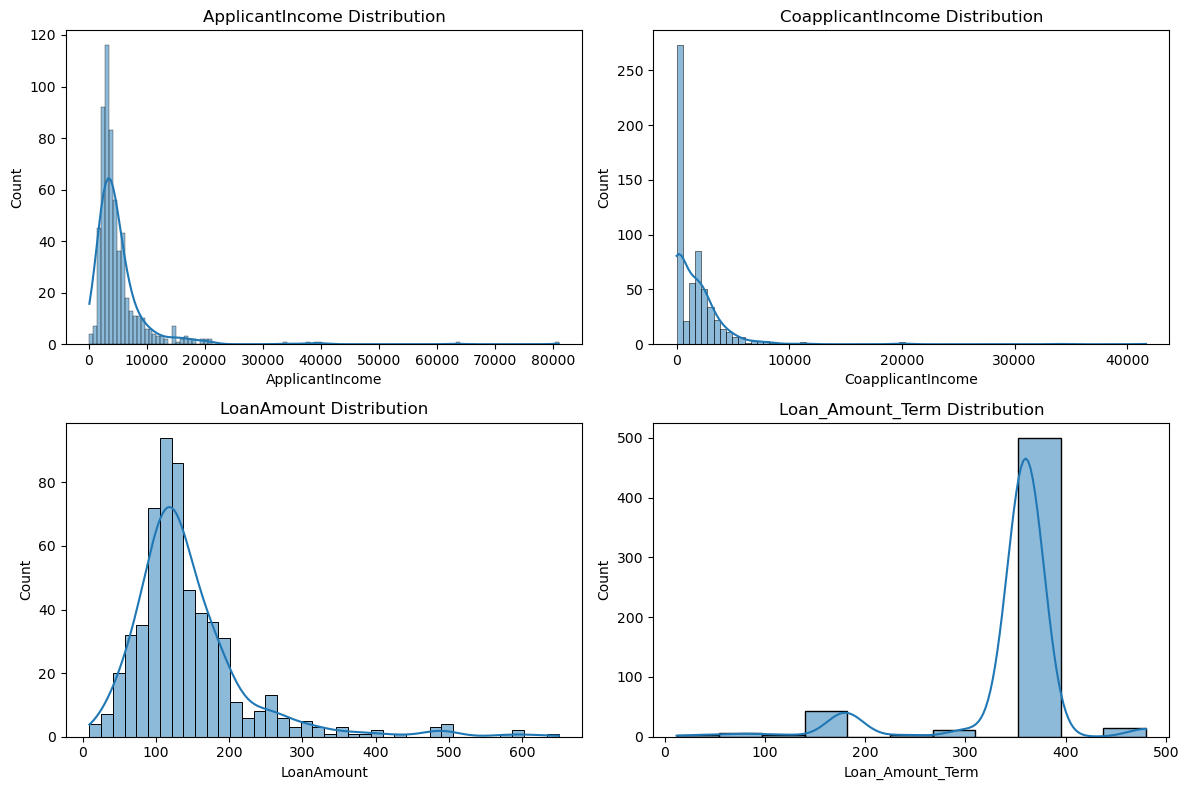

In [83]:
# Add distribution plots for numerical features
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(num_features):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} Distribution')
plt.tight_layout()

# Data Transformation

In [84]:
# Importing label encoder to change categoricasl variables into int type
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

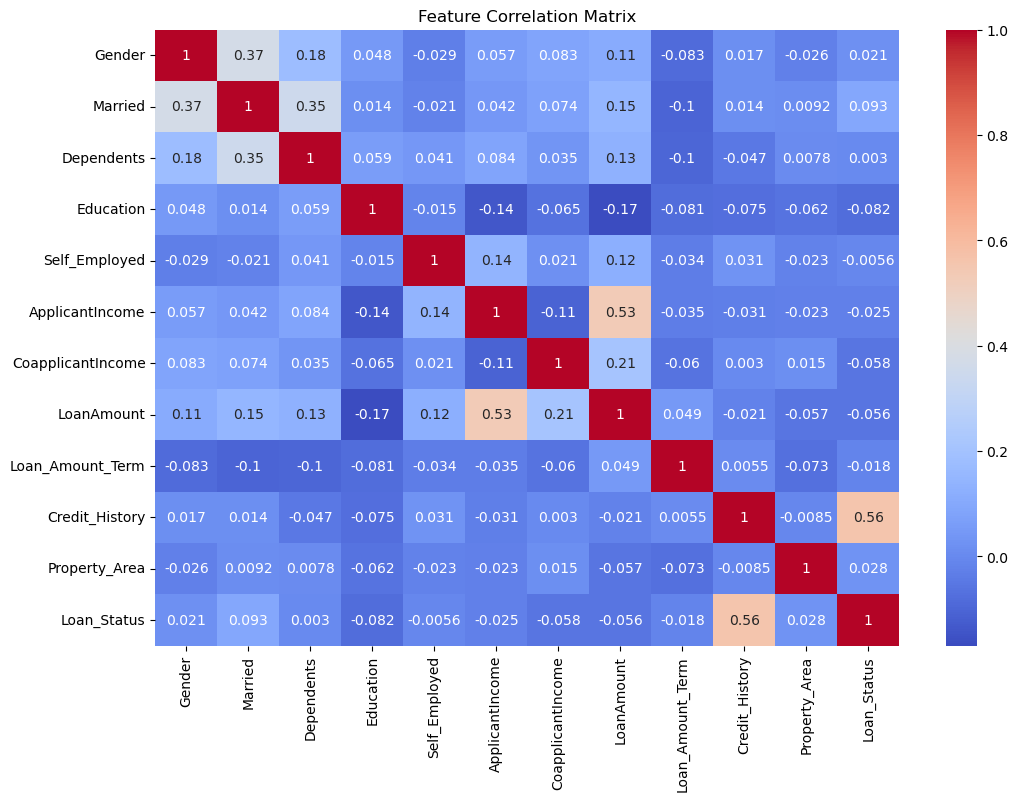

Text(0.5, 1.02, 'Pairwise Relationships by Loan Status')

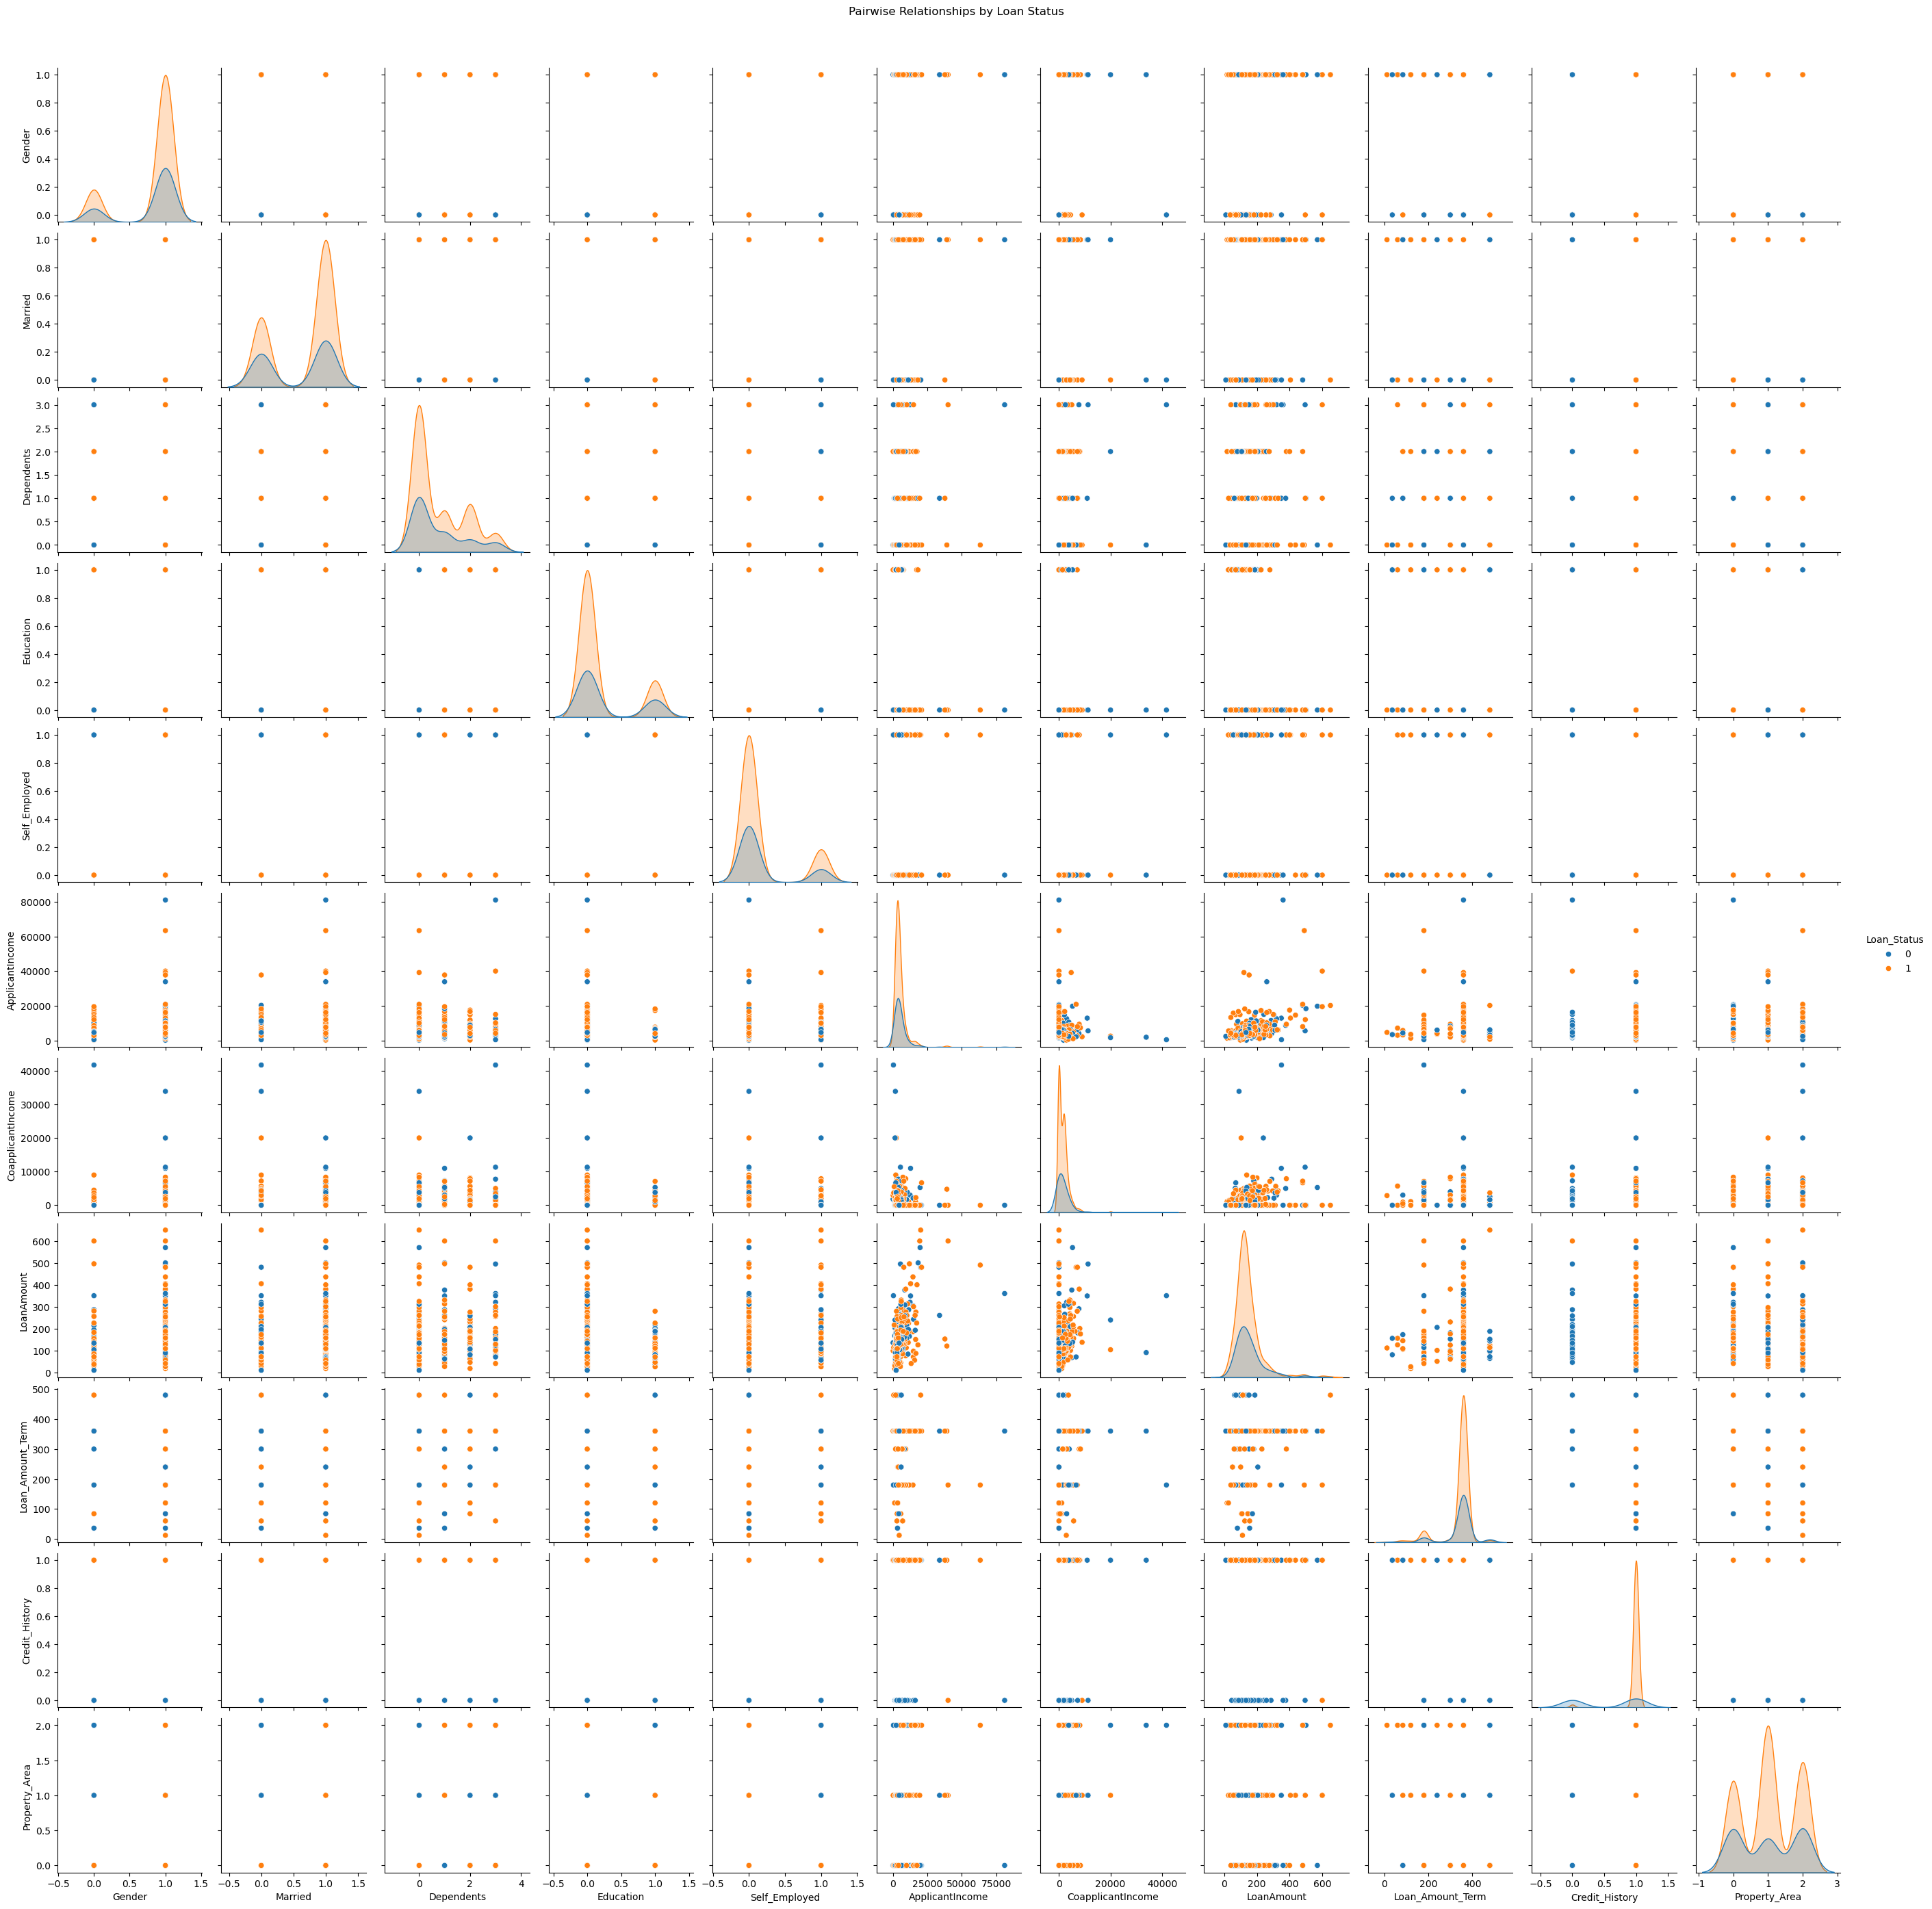

In [85]:
# Add correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Add pairplot for numerical features
sns.pairplot(data, hue='Loan_Status')
plt.suptitle('Pairwise Relationships by Loan Status', y=1.02)

## Takeaways 

### There is a correlation between applicant income and loan amount
### Also credit history has a direct impact on loan status

In [86]:
#Checking the number of missing values
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
#filling the missing values with the mean of the column
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Mining

In [88]:
#Dropping the target column
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']

In [89]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

## KNN, Random Forest, SVC, Logstic Regression

In [90]:
#using KNN, Random Forest, SVC, Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.60893854748603


c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
print("Accuracy score of ", gbc.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  GradientBoostingClassifier = 77.08333333333334


## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4, 5, 6, 7, 8],
        'criterion' :['gini', 'entropy']
    }
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)


c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\y2907\anaconda3\Lib\site-packag

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}


In [94]:
#Using the results of hyperparameter tuning on Random Forest Classifier
best_params = grid.best_params_
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, Y_train)
Y_pred_tuned = best_rfc.predict(X_test)

print("Accuracy score of tuned RandomForestClassifier= ", 100*metrics.accuracy_score(Y_test, Y_pred_tuned))

Accuracy score of tuned RandomForestClassifier=  82.5


In [95]:
#Using the results of hyperparameter tuning on Gradient Boosting Classifier
param_grid_gbc = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_gbc = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gbc, cv=5)
grid_gbc.fit(X_train, Y_train)

print(grid_gbc.best_params_)

best_gbc = GradientBoostingClassifier(**grid_gbc.best_params_)
best_gbc.fit(X_train, Y_train)
Y_pred_gbc_tuned = best_gbc.predict(X_test)

print("Accuracy score of tuned GradientBoostingClassifier= ", 100*metrics.accuracy_score(Y_test, Y_pred_gbc_tuned))

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy score of tuned GradientBoostingClassifier=  81.66666666666667
